In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
rejected = pd.read_csv("rejected_2007_to_2018Q4.csv")

# Cleaning of "Rejected" Dataset

In [3]:
rejected.shape

(15179, 9)

In [4]:
rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [5]:
rejected.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [6]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15179 entries, 0 to 15178
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount Requested      15179 non-null  float64
 1   Application Date      15179 non-null  object 
 2   Loan Title            15178 non-null  object 
 3   Risk_Score            14406 non-null  float64
 4   Debt-To-Income Ratio  15179 non-null  object 
 5   Zip Code              15158 non-null  object 
 6   State                 15158 non-null  object 
 7   Employment Length     15178 non-null  object 
 8   Policy Code           15178 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.0+ MB


In [7]:
rejected.describe()

,Amount Requested,Risk_Score,Policy Code
count,15179.000000,14406.000000,15178.0
mean,9706.453783,566.654172,0.0
std,7446.411975,146.231879,0.0
min,500.000000,0.000000,0.0
25%,3587.500000,506.000000,0.0
50%,7500.000000,594.000000,0.0
75%,15000.000000,659.000000,0.0
max,35000.000000,821.000000,0.0


In [8]:
rejected.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15179 entries, 0 to 15178
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount Requested      15179 non-null  float64
 1   Application Date      15179 non-null  object 
 2   Loan Title            15178 non-null  object 
 3   Risk_Score            14406 non-null  float64
 4   Debt-To-Income Ratio  15179 non-null  object 
 5   Zip Code              15158 non-null  object 
 6   State                 15158 non-null  object 
 7   Employment Length     15178 non-null  object 
 8   Policy Code           15178 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.0+ MB


In [9]:
rejected.isnull()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15174,False,False,False,False,False,False,False,False,False
15175,False,False,False,False,False,False,False,False,False
15176,False,False,False,False,False,False,False,False,False
15177,False,False,False,False,False,False,False,False,False


In [10]:
rejected.isnull().count

<bound method DataFrame.count of        Amount Requested  Application Date  ...  Employment Length  Policy Code
0                 False             False  ...              False        False
1                 False             False  ...              False        False
2                 False             False  ...              False        False
3                 False             False  ...              False        False
4                 False             False  ...              False        False
...                 ...               ...  ...                ...          ...
15174             False             False  ...              False        False
15175             False             False  ...              False        False
15176             False             False  ...              False        False
15177             False             False  ...              False        False
15178             False             False  ...               True         True

[15179 rows x 9 co

In [11]:
rejected.isnull().sum(axis=0)

Amount Requested          0
Application Date          0
Loan Title                1
Risk_Score              773
Debt-To-Income Ratio      0
Zip Code                 21
State                    21
Employment Length         1
Policy Code               1
dtype: int64

In [12]:
category_col=rejected.select_dtypes(include=['object']).columns.tolist()
category_col

['Application Date',
 'Loan Title',
 'Debt-To-Income Ratio',
 'Zip Code',
 'State',
 'Employment Length']

In [13]:
integer_col=rejected.select_dtypes(include=['int64','float64']).columns.tolist()
integer_col

['Amount Requested', 'Risk_Score', 'Policy Code']

In [14]:
for column in rejected:
    if rejected[column].isnull().any():
        if(column in category_col):
            rejected[column]=rejected[column].fillna(rejected[column].mode()[0])
        else:
            rejected[column]=rejected[column].fillna(rejected[column].mean())

In [15]:
rejected.isnull().sum(axis=0)

Amount Requested        0
Application Date        0
Loan Title              0
Risk_Score              0
Debt-To-Income Ratio    0
Zip Code                0
State                   0
Employment Length       0
Policy Code             0
dtype: int64

# Analysis of "Rejected" Dataset

In [16]:
rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


### Graphs on Debt-to-income ratio and risk score

In [17]:
rejected_temp = rejected.copy()

In [18]:
rejected_temp = rejected.copy()
rejected_temp['Debt-To-Income Ratio'] = rejected_temp['Debt-To-Income Ratio'].str.replace(r'%','')

In [19]:
rejected_temp['Debt-To-Income Ratio'] = rejected_temp['Debt-To-Income Ratio'].astype(float)
rejected_temp['Debt-To-Income Ratio'] = round(rejected_temp['Debt-To-Income Ratio'],0)
rejected_temp['Debt-To-Income Ratio'] = rejected_temp['Debt-To-Income Ratio'].astype(int)

In [20]:
i = rejected_temp[rejected_temp['Debt-To-Income Ratio'] == -1].index

In [21]:
rejected_temp.drop(i, inplace=True)

In [22]:
rejected_temp['Debt-To-Income Ratio'] #All values are in percentages, but we removed % sign and made the column data type numeric

0        10
1        10
2        10
3        39
4         9
         ..
15174    20
15175     1
15176     2
15177    20
15178     5
Name: Debt-To-Income Ratio, Length: 14810, dtype: int64

In [23]:
r_t = rejected_temp[['Risk_Score','Debt-To-Income Ratio']]

In [24]:
r_t['Risk_Score']

0        693.0
1        703.0
2        715.0
3        698.0
4        509.0
         ...  
15174    668.0
15175    488.0
15176    430.0
15177    630.0
15178    647.0
Name: Risk_Score, Length: 14810, dtype: float64

In [25]:
r_t['Debt-To-Income Ratio']

0        10
1        10
2        10
3        39
4         9
         ..
15174    20
15175     1
15176     2
15177    20
15178     5
Name: Debt-To-Income Ratio, Length: 14810, dtype: int64

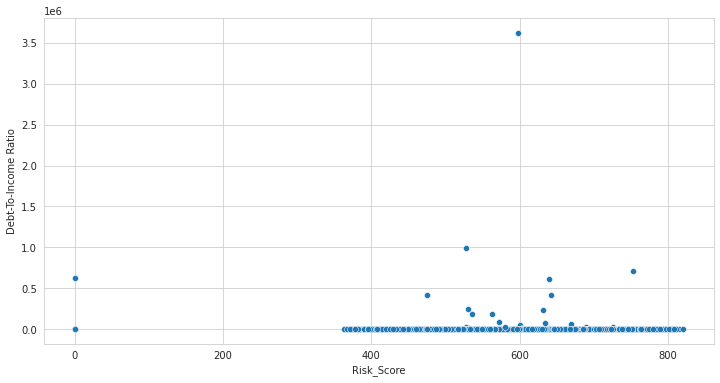

In [26]:
plt.figure(figsize=(12,6))
r_t = rejected_temp[['Risk_Score','Debt-To-Income Ratio']]
r_t = r_t.set_index('Risk_Score')
sns.scatterplot(x = r_t.index, y=r_t['Debt-To-Income Ratio'])

### Graphs On Amount Requested and Application Date(Analysed on yearly basis)

In [27]:
rejected[['Amount Requested','Application Date']]

,Amount Requested,Application Date
0,1000.0,2007-05-26
1,1000.0,2007-05-26
2,11000.0,2007-05-27
3,6000.0,2007-05-27
4,1500.0,2007-05-27
...,...,...
15174,7000.0,2008-04-16
15175,5000.0,2008-04-16
15176,5000.0,2008-04-16
15177,5000.0,2008-04-16


In [28]:
rejected_temp['Application Date'] = pd.to_datetime(rejected_temp['Application Date'], format='%Y-%m-%d')

In [29]:
rejected_temp['Year'] = pd.DatetimeIndex(rejected_temp['Application Date']).year

In [30]:
rejected_temp.groupby('Year').sum()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Policy Code
Year,,,,
2007,45080121.58,2.903830e+06,6074157,0.0
2008,98579440.39,5.486752e+06,3016924,0.0


Text(0, 0.5, 'Amount Requested')

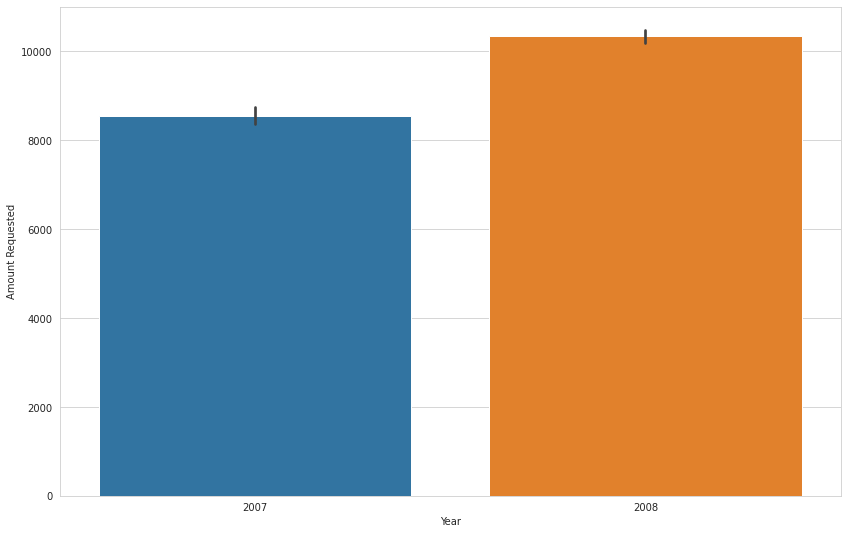

In [31]:
plt.figure(figsize=(14,9))
sns.barplot(x='Year', y='Amount Requested', data=rejected_temp)
plt.xlabel('Year')
plt.ylabel('Amount Requested')

Text(0, 0.5, 'Amount Requested')

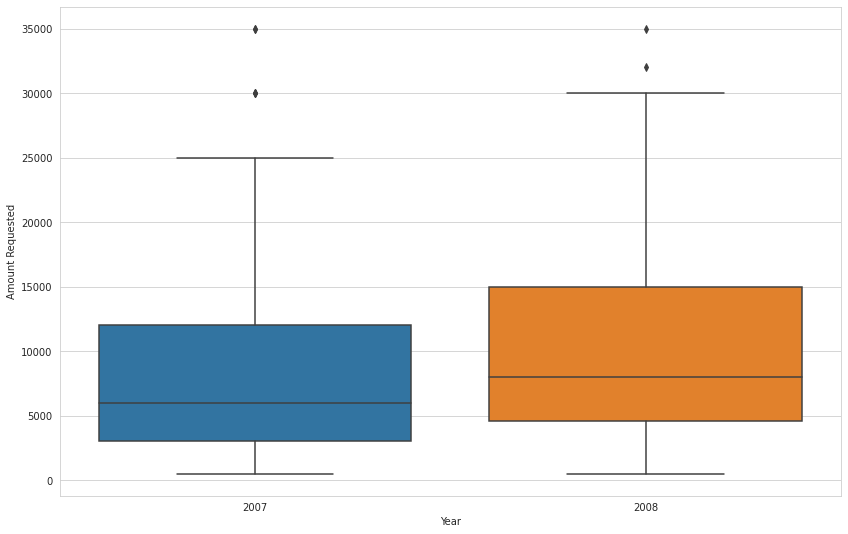

In [32]:
plt.figure(figsize=(14,9))
sns.boxplot(x='Year', y='Amount Requested', data=rejected_temp)
plt.xlabel('Year')
plt.ylabel('Amount Requested')